In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import surp
import surp.gce_math as gcem
import arya
import vice

In [3]:
def calc_y(Z=gcem.Z_SUN, ele="c"):
    m_c, times = vice.single_stellar_population(ele, Z=Z, mstar=1)
    return m_c[-1]

calc_y = np.vectorize(calc_y)

In [4]:
def find_model(name):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the csv summary
    """
    
    file_name = "../models/" + name + "/stars.csv"
    model =  pd.read_csv(file_name, index_col=0)
    return model

In [5]:
def plot_data(x="MG_H", y="C_MG", **kwargs):
    data_kwargs = dict(
        color="k", 
        stat="median",
    )
    kwargs = dict(numbins=20, **kwargs)

    
    df = surp.plots.filter_high_alpha(surp.subgiants)
    arya.medianplot(df, x=x, y=y, zorder=-2, **data_kwargs, **kwargs)

In [6]:
def plot_model(model, x="MG_H", y="C_MG", **kwargs,):
    model_kwargs = dict(
        stat="median", errorbar=None,
        aes="line", numbins=20
    )
    df = surp.plots.filter_high_alpha(model)

    arya.medianplot(df, x=x, y=y, label="model", **model_kwargs, **kwargs)


In [7]:
def plot_eq(**kwargs):
    surp.yields.set_yields(verbose=True, **kwargs)

    M_H = np.linspace(-0.45, 0.45, 1000)
    Zs = gcem.MH_to_Z(M_H)
    y_mg = vice.yields.ccsne.settings["mg"]
    ys = calc_y(Zs)
    ymg = calc_y(Zs, "mg")


    co = gcem.abund_to_brak(ys / ymg, "C", "MG")
    oh = gcem.abund_to_brak(ymg, "C", "MG")
    
    plt.plot(M_H, co, label="equilibrium")


In [8]:
def compare(name, **kwargs):
    model = find_model(name)

    plot_data()
    plot_model(model)
    plot_eq(**kwargs)
    
    plt.title(name)
    plt.legend()

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 4.40e-02 (Z - Z0)   1.50 × cristallo11             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
y0_agb  0.00038
z0_agb  -0.01
agb_model:  cristallo11
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




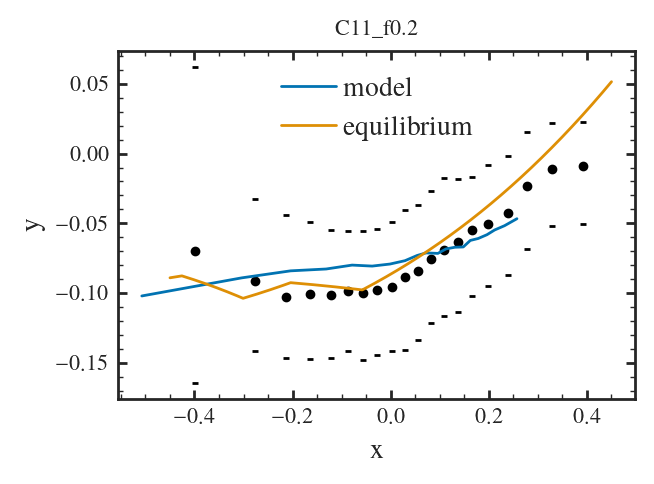

In [9]:
compare("C11_f0.2", f_agb=0.2)


yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 9.23e-02 (Z - Z0)   1.58 × karakas16               0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
y0_agb  0.00036
z0_agb  -0.04
agb_model:  karakas16
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




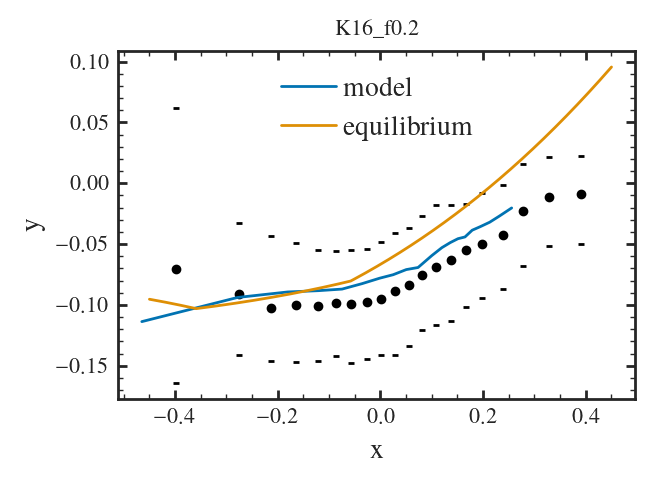

In [10]:
compare("K16_f0.2", agb_model="karakas16")

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 1.38e-01 (Z - Z0)   2.71 × ventura13               0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
y0_agb  0.00021
z0_agb  -0.04
agb_model:  ventura13
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




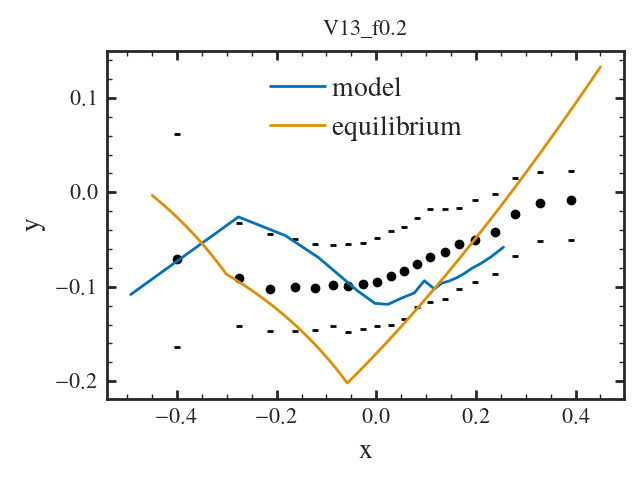

In [11]:
compare("V13_f0.2", agb_model="ventura13")

In [ ]:
compare("P16_f0.2", agb_model="pignatari16")

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 3.73e-02 (Z - Z0)   0.83 × pignatari16             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
y0_agb  0.00069
z0_agb  -0.01
agb_model:  pignatari16
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




In [13]:
surp.yields.set_yields(f_agb=0.2)

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 4.40e-02 (Z - Z0)   1.50 × cristallo11             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
y0_agb  0.00038
z0_agb  -0.01
agb_model:  cristallo11
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




In [18]:
def plot_ssp_mgh(Z, **kwargs):
    m_c, times = vice.single_stellar_population("c", Z=Z, mstar=1)
    m_mg, times = vice.single_stellar_population("mg", Z=Z, mstar=1)

    c_mg = gcem.abund_to_brak(np.array(m_c)/m_mg, "C", "MG")
    fe_mg = gcem.abund_to_brak(np.array(m_mg), "Fe", "MG")
    plt.plot(mg_h, c_mg, **kwargs)


In [19]:
def plot_ssp_femg(Z, **kwargs):
    m_c, times = vice.single_stellar_population("c", Z=Z, mstar=1)
    m_mg, times = vice.single_stellar_population("mg", Z=Z, mstar=1)
    m_fe, times = vice.single_stellar_population("fe", Z=Z, mstar=1)

    c_mg = gcem.abund_to_brak(np.array(m_c)/m_mg, "C", "MG")
    mg_fe = gcem.abund_to_brak(np.array(m_mg)/m_fe, "MG", "FE")
    plt.plot(mg_fe, c_mg, **kwargs)


In [33]:
fiducial = surp.ViceModel.from_saved("../models/C11_f0.2/model.json")

Text(0.5, 1.0, 'Binned APOGEE trends')

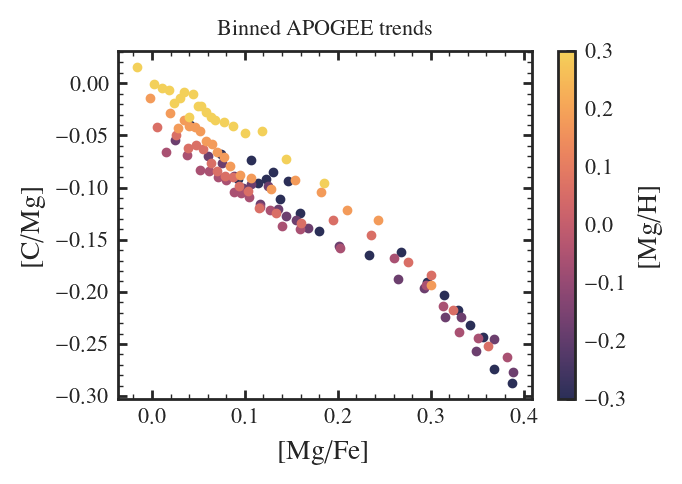

In [16]:
hm = arya.figure.colorbar.HueMap((-0.3, 0.3))

for c in np.linspace(-0.3, 0.3, 6):
    df = surp.plots.filter_metallicity(surp.subgiants,w=0.05,c=c)
    arya.medianplot(df, "MG_FE", "C_MG", numbins=20, color=hm(c), errorbar=None)

arya.Colorbar(hm, label="[Mg/H]")
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")
plt.title("Binned APOGEE trends")

/tmp/slurmtmp.26069141/ipykernel_19055/1533341937.py:6: RuntimeWarning: invalid value encountered in divide
  c_mg = gcem.abund_to_brak(np.array(m_c)/m_mg, "C", "MG")
/tmp/slurmtmp.26069141/ipykernel_19055/1533341937.py:7: RuntimeWarning: invalid value encountered in divide
  mg_fe = gcem.abund_to_brak(np.array(m_mg)/m_fe, "MG", "FE")
/tmp/slurmtmp.26069141/ipykernel_19055/3759587603.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin' will be ignored
  plt.scatter(fiducial.stars.MG_FE, fiducial.stars.C_MG, s=0.1, alpha=1, vmin=-0.5)


Text(0, 0.5, '[C/Mg]')

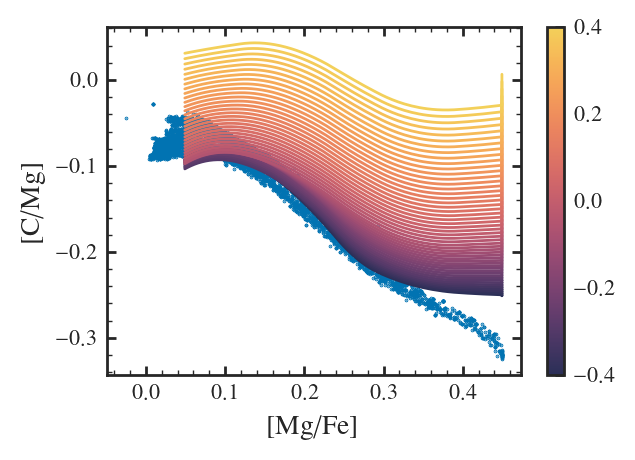

In [20]:
hm = arya.figure.colorbar.HueMap((-0.4, 0.4))

for MH in np.linspace(-0.4, 0.4):
    plot_ssp_femg(Z=gcem.MH_to_Z(MH), c=hm(MH))
arya.Colorbar(hm)

plt.scatter(fiducial.stars.MG_FE, fiducial.stars.C_MG, s=0.1, alpha=1, vmin=-0.5)
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

## Properties of solar stars

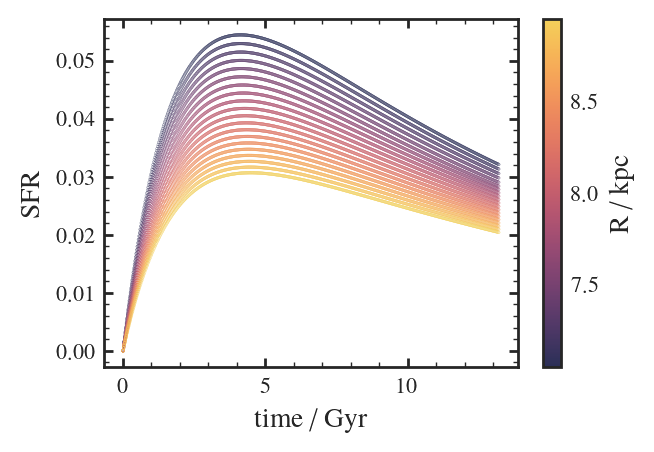

In [21]:
filt = fiducial.history.R > 7
filt &= fiducial.history.R < 9
h = fiducial.history[filt]
plt.scatter(h.time, h.sfr, s=0.01, alpha=1, c=h.R)
plt.xlabel("time / Gyr")
plt.ylabel(r"SFR")
plt.colorbar(label="R / kpc")

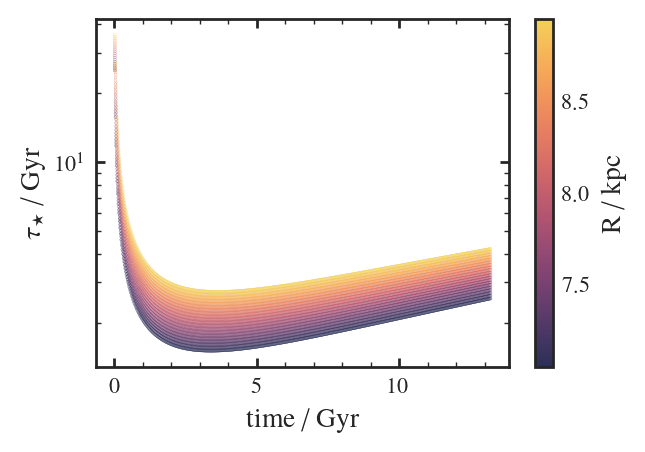

In [21]:
filt = fiducial.history.R > 7
filt &= fiducial.history.R < 9
h = fiducial.history[filt]
plt.scatter(h.time, 1/(h.sfr/ h.mgas * 1e9), s=0.01, alpha=1, c=h.R)
plt.yscale("log")
plt.xlabel("time / Gyr")
plt.ylabel(r"$\tau_\star$ / Gyr")
plt.colorbar(label="R / kpc")

# Singlezones

In [14]:
def sfh_linexp(tau_sfh=5):
    return lambda t: t *np.exp(-t/tau_sfh)
def sfh_2exp(tau_rise=3, tau_sfh=15):
    return lambda t: np.exp(-t/tau_sfh) * (1 - np.exp(-t/tau_rise))

def sfh_const():
    return lambda t: 1 + 0*t

def sz_model(eta=0.5, tau_star=2, sfh=sfh_2exp(), dt=0.01, t_end=13, mode="gas"):
    sz = vice.singlezone(elements=["o", "mg", "c", "fe"], dt=dt, eta=eta, func=sfh, mode=mode, tau_star=tau_star, Mg0=0)
    out = sz.run(np.arange(0, t_end, dt), capture=True, overwrite=True)
    return out

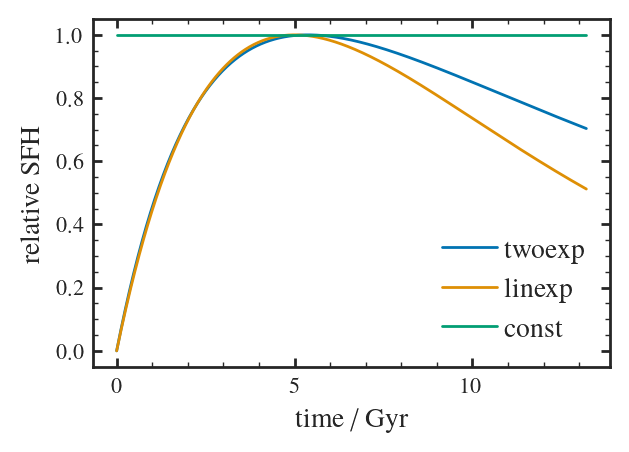

In [47]:
x = np.linspace(0, 13.2, 1000)
y1 = sfh_2exp()(x)
y2 = sfh_linexp()(x)
y3 = sfh_const()(x)

plt.plot(x, y1 / np.max(y1), label="twoexp")
plt.plot(x, y2 / np.max(y2), label="linexp")
plt.plot(x, y3 / np.max(y3), label="const")

plt.xlabel("time / Gyr")
plt.ylabel("relative SFH")
plt.legend()

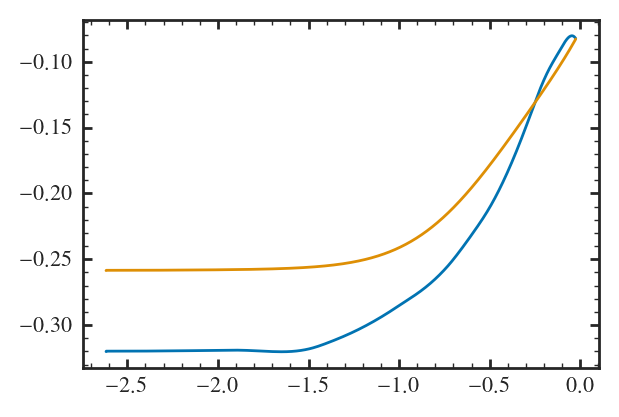

In [48]:
plt.plot(sz_f.history["[mg/h]"], sz_f.history["[c/mg]"] )
plt.plot(sz.history["[mg/h]"], sz.history["[c/mg]"], label="analytic" )

In [49]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.000, tau_agb=0.3, t_D=0.0), verbose=False)
sz = sz_model()

surp.yields.set_yields(verbose=False) #agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.0), f_agb=0.4)
sz_f = sz_model()

/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1850: VisibleRuntimeWarning: Functions of stellar mass and metallicity #for asymptotic giant branch star yields may significantly increase the #required integration time, especially for fine #timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1705: PicklingWarning: Cannot locate reference to <class 'vice.core.mlr.mlr'>.
  warnings.warn('Cannot locate reference to %r.' % (obj,), PicklingWarning)
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1707: PicklingWarning: Cannot pickle <class 'vice.core.mlr.mlr'>: vice.core.mlr.mlr has recursive self-references that trigger a RecursionError.
  warnings.warn('Cannot pickle %r: %s.%s has recursive self-references that trigger a RecursionError.' % (obj, obj.__module__, obj_name), PicklingWarning)
/us

/tmp/slurmtmp.26069141/ipykernel_19055/1533341937.py:6: RuntimeWarning: invalid value encountered in divide
  c_mg = gcem.abund_to_brak(np.array(m_c)/m_mg, "C", "MG")
/tmp/slurmtmp.26069141/ipykernel_19055/1533341937.py:7: RuntimeWarning: invalid value encountered in divide
  mg_fe = gcem.abund_to_brak(np.array(m_mg)/m_fe, "MG", "FE")


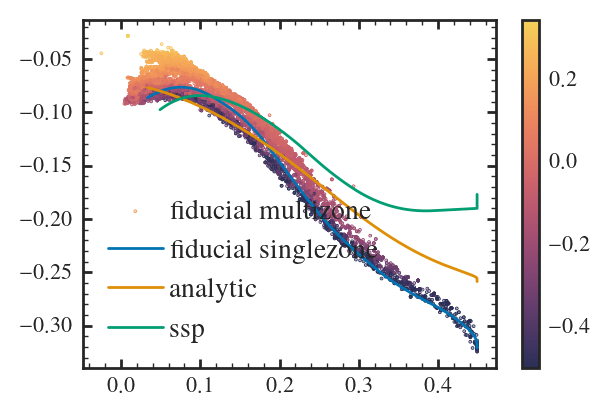

In [51]:
plt.scatter(fiducial.stars.MG_FE, fiducial.stars.C_MG, c=fiducial.stars.MG_H, s=0.1, alpha=1, vmin=-0.5, label="fiducial multizone")
plt.plot(sz_f.history["[mg/fe]"], sz_f.history["[c/mg]"], label="fiducial singlezone" )
plt.plot(sz.history["[mg/fe]"], sz.history["[c/mg]"], label="analytic" )
plot_ssp_femg(0.014, label="ssp")

plt.legend()
plt.colorbar()


/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1850: VisibleRuntimeWarning: Functions of stellar mass and metallicity #for asymptotic giant branch star yields may significantly increase the #required integration time, especially for fine #timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1705: PicklingWarning: Cannot locate reference to <class 'vice.core.mlr.mlr'>.
  warnings.warn('Cannot locate reference to %r.' % (obj,), PicklingWarning)
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1707: PicklingWarning: Cannot pickle <class 'vice.core.mlr.mlr'>: vice.core.mlr.mlr has recursive self-references that trigger a RecursionError.
  warnings.warn('Cannot pickle %r: %s.%s has recursive self-references that trigger a RecursionError.' % (obj, obj.__module__, obj_name), PicklingWarning)
/us

Text(0, 0.5, '[C/Mg]')

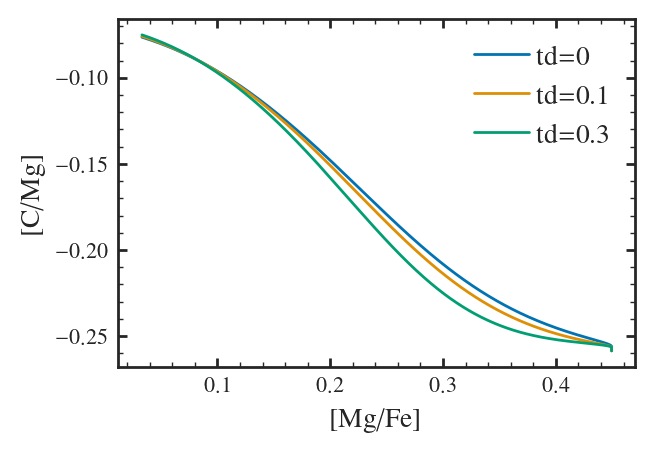

In [193]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.000, tau_agb=0.4, t_D=0.0), verbose=False)
sz1 = sz_model()

surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.000, tau_agb=0.4, t_D=0.1), verbose=False)
sz2 = sz_model()

surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.000, tau_agb=0.4, t_D=0.3), verbose=False)
sz3 = sz_model()

plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label="td=0" )
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label="td=0.1" )
plt.plot(sz3.history["[mg/fe]"], sz3.history["[c/mg]"], label="td=0.3" )


plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

In [ ]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01), f_agb=0.0,  verbose=False)

sz0 = sz_model()
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01), f_agb=0.15,  verbose=False)

sz1 = sz_model()
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01), f_agb=0.3,  verbose=False)

sz2 = sz_model()

plt.plot(sz0.history["[mg/fe]"], sz0.history["[c/mg]"], label="f=0" )
plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label="f=0.15" )
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label="f=0.30" )

plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1850: VisibleRuntimeWarning: Functions of stellar mass and metallicity #for asymptotic giant branch star yields may significantly increase the #required integration time, especially for fine #timestepping.
  return self.__c_version.run(output_times, capture = capture,


In [ ]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01), verbose=False)
sz1 = sz_model()

surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.0), verbose=False)
sz2 = sz_model()

surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01), zeta_cc=0, verbose=False)
sz3 = sz_model()

surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.00), zeta_cc=0, verbose=False)
sz4 = sz_model()



plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label="analytic")
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label="no agb z dep" )
plt.plot(sz3.history["[mg/fe]"], sz3.history["[c/mg]"], label="no c z dep" )
plt.plot(sz4.history["[mg/fe]"], sz4.history["[c/mg]"], label="no z dep" )

plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

In [ ]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01, tau_agb=0.3, t_D=0.1), verbose=False)
sz1 = sz_model()

surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01, tau_agb=0.5, t_D=0.1), verbose=False)
sz2 = sz_model()


surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01, tau_agb=0.1, t_D=0.1), verbose=False)
sz3 = sz_model()


plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label=r"$\tau_{\rm agb} = 0.3$" )
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label=r"$\tau_{\rm agb} = 0.5$" )
plt.plot(sz3.history["[mg/fe]"], sz3.history["[c/mg]"], label=r"$\tau_{\rm agb} = 0.1$" )

plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

In [ ]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01), verbose=False)

sz0 = sz_model(eta=0)
sz1 = sz_model(eta=1)
sz2 = sz_model(eta=2)

plt.plot(sz0.history["[mg/fe]"], sz0.history["[c/mg]"], label="eta=2" )
plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label="eta=1" )
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label="eta=0" )

plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1850: VisibleRuntimeWarning: Functions of stellar mass and metallicity #for asymptotic giant branch star yields may significantly increase the #required integration time, especially for fine #timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1705: PicklingWarning: Cannot locate reference to <class 'vice.core.mlr.mlr'>.
  warnings.warn('Cannot locate reference to %r.' % (obj,), PicklingWarning)
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1707: PicklingWarning: Cannot pickle <class 'vice.core.mlr.mlr'>: vice.core.mlr.mlr has recursive self-references that trigger a RecursionError.
  warnings.warn('Cannot pickle %r: %s.%s has recursive self-references that trigger a RecursionError.' % (obj, obj.__module__, obj_name), PicklingWarning)
/us

Text(0, 0.5, '[C/Mg]')

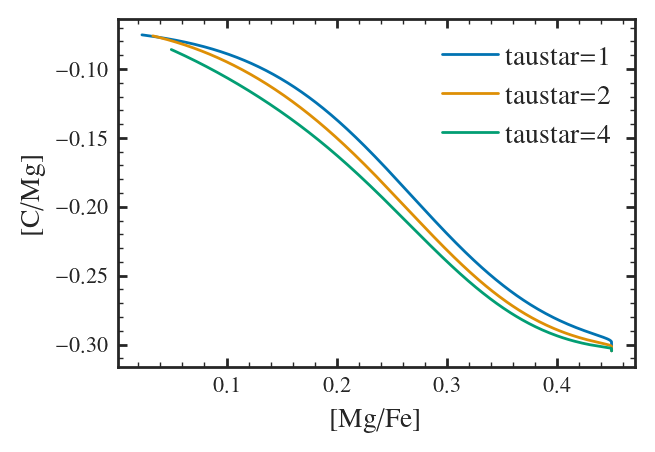

In [12]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.01), verbose=False)

sz0 = sz_model(tau_star=1)
sz1 = sz_model(tau_star=2)
sz2 = sz_model(tau_star=4)

plt.plot(sz0.history["[mg/fe]"], sz0.history["[c/mg]"], label="taustar=1" )
plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label="taustar=2" )
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label="taustar=4" )

plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

In [ ]:
sz1 = sz_model(sfh=sfh_linexp(tau_sfh=3))
sz2 = sz_model(sfh=sfh_linexp(tau_sfh=5))
sz3 = sz_model(sfh=sfh_linexp(tau_sfh=15))

plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label="tsfh=3" )
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label="tsfh=5" )
plt.plot(sz3.history["[mg/fe]"], sz3.history["[c/mg]"], label="tsfh=15" )

plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

Text(0, 0.5, '[C/Mg]')

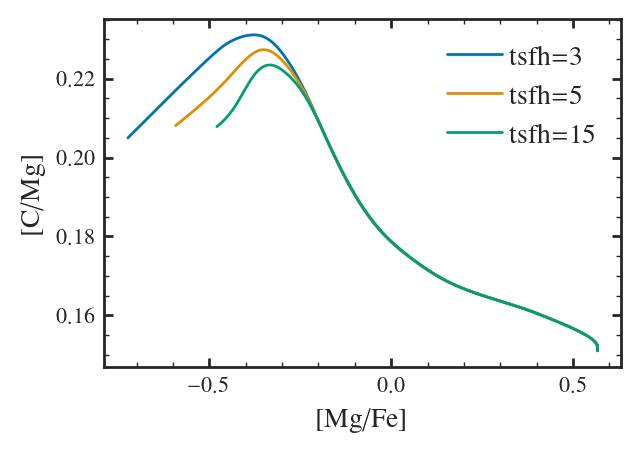

In [11]:
sz1 = sz_model(sfh=sfh_2exp(tau_sfh=3))
sz2 = sz_model(sfh=sfh_2exp(tau_sfh=5))
sz3 = sz_model(sfh=sfh_2exp(tau_sfh=15))

plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label="tsfh=3" )
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label="tsfh=5" )
plt.plot(sz3.history["[mg/fe]"], sz3.history["[c/mg]"], label="tsfh=15" )

plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 2.90e-02 (Z - Z0)   (5.70e-04 + -0.00e+00(Z-Zo)),  0                              
                                                   t_D=0.10, tau=0.30                                            

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
Y agb 0.0005700000000000001
zeta agb -0.0
agb_model:  A
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1850: VisibleRuntimeWarning: Functions of stellar mass and metallicity #for asymptotic giant branch star yields may significantly increase the #required integration time, especially for fine #timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1705: PicklingWarning: Cannot locate reference to <class 'vice.core.mlr.mlr'>.
  warnings.warn('Cannot locate reference to %r.' % (obj,), PicklingWarning)
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1707: PicklingWarning: Cannot pickle <class 'vice.core.mlr.mlr'>: vice.core.mlr.mlr has recursive self-references that trigger a RecursionError.
  warnings.warn('Cannot pickle %r: %s.%s has recursive self-references that trigger a RecursionError.' % (obj, obj.__module__, obj_name), PicklingWarning)
/us

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 2.90e-02 (Z - Z0)   (5.70e-04 + -0.00e+00(Z-Zo)),  0                              
                                                   t_D=0.10, tau=0.30                                            

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
Y agb 0.0005700000000000001
zeta agb -0.0
agb_model:  A
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




Text(0, 0.5, '[C/Mg]')

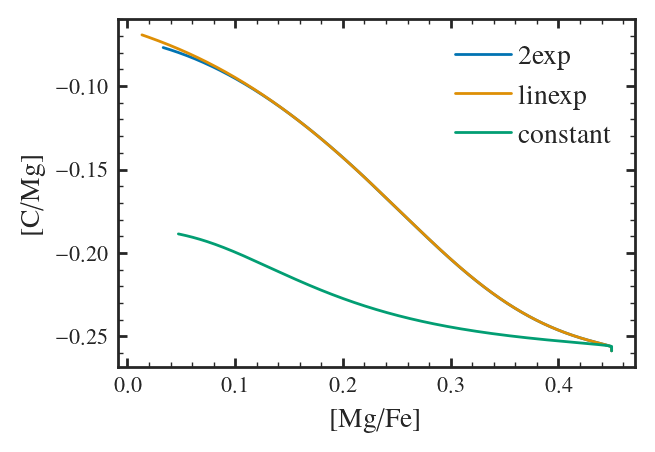

In [88]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.00, tau_agb=0.3, t_D=0.1), verbose=True)


sz1 = sz_model(mode="gas")
sz2 = sz_model(sfh=sfh_linexp(), mode="gas")

surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.00, tau_agb=0.3, t_D=0.1), verbose=True)
vice.yields.agb.settings["c"] = surp.yield_models.ZeroAGB()
sz3 = sz_model(sfh=sfh_const(), mode="gas")

plt.plot(sz1.history["[mg/fe]"], sz1.history["[c/mg]"], label="2exp" )
plt.plot(sz2.history["[mg/fe]"], sz2.history["[c/mg]"], label="linexp" )
plt.plot(sz3.history["[mg/fe]"], sz3.history["[c/mg]"], label="constant" )

plt.legend()
plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

Do the analytic doew work?


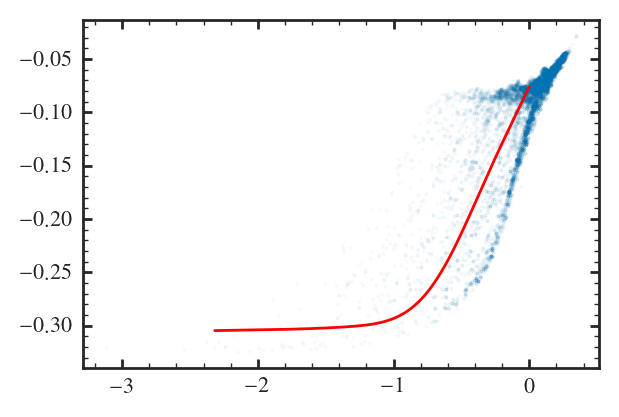

In [47]:
plt.plot(sz1.history["[mg/h]"], sz1.history["[c/mg]"], label="2exp", zorder=2, color="r")
plt.scatter(fiducial.stars.MG_H.values, fiducial.stars.C_MG.values, s=0.1, alpha=0.05)

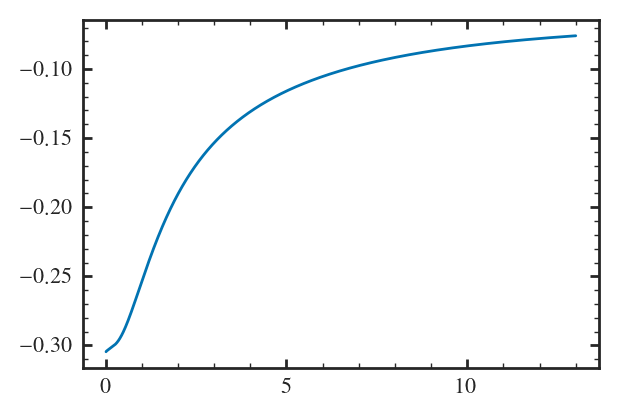

In [15]:
plt.plot(sz1.history["time"], sz1.history["[c/mg]"])

In [ ]:
1

In [81]:
def sfh_const():
    return lambda t: 1 + 0*t

def sz_model(eta=0.5, tau_star=2, sfh=sfh_2exp(), dt=0.01, t_end=13, mode="gas"):
    sz = vice.singlezone(elements=["o", "mg", "c", "fe"], dt=dt, eta=eta, func=sfh, mode=mode, tau_star=tau_star, Mg0=0)
    out = sz.run(np.arange(0, t_end, dt), capture=True, overwrite=True)
    return out

In [182]:
surp.yields.set_yields(no_negative=True)
vice.yields.ccsne.settings["c"] = 0
vice.yields.ccsne.settings["fe"] = 0
sz_f = sz_model(sfh=sfh_const(), mode="gas")

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 4.40e-02 (Z - Z0)   1.50 × cristallo11             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
y0_agb  0.00038
z0_agb  -0.01
agb_model:  cristallo11
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/singlezone/singlezone.py:1850: VisibleRuntimeWarning: Functions of stellar mass and metallicity #for asymptotic giant branch star yields may significantly increase the #required integration time, especially for fine #timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


In [177]:
surp.yields.set_yields(agb_model="A", a_agb_kwargs=dict(zeta_agb=-0.00, tau_agb=0.3, t_D=0.), verbose=True)
vice.yields.ccsne.settings["c"] = 0
vice.yields.ccsne.settings["fe"] = 0
sz = sz_model(sfh=sfh_const(), mode="gas")

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 2.90e-02 (Z - Z0)   (5.70e-04 + -0.00e+00(Z-Zo)),  0                              
                                                   t_D=0.00, tau=0.30                                            

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       



total c yield
Y agb 0.0005700000000000001
zeta agb -0.0
agb_model:  A
0.002850 + 0.029000 (Z-Zo)
f_agb = 0.2000




/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1705: PicklingWarning: Cannot locate reference to <class 'vice.core.mlr.mlr'>.
  warnings.warn('Cannot locate reference to %r.' % (obj,), PicklingWarning)
/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/dill/_dill.py:1707: PicklingWarning: Cannot pickle <class 'vice.core.mlr.mlr'>: vice.core.mlr.mlr has recursive self-references that trigger a RecursionError.
  warnings.warn('Cannot pickle %r: %s.%s has recursive self-references that trigger a RecursionError.' % (obj, obj.__module__, obj_name), PicklingWarning)


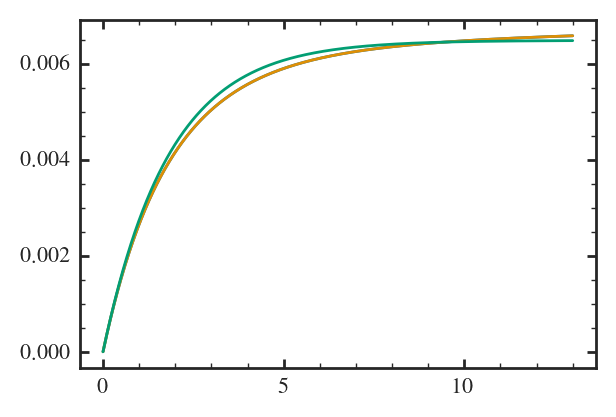

In [175]:
t = np.array(sz.history["time"])
plt.plot(t, sz.history["z(o)"])

y = o_model(t)
plt.plot(t, y)


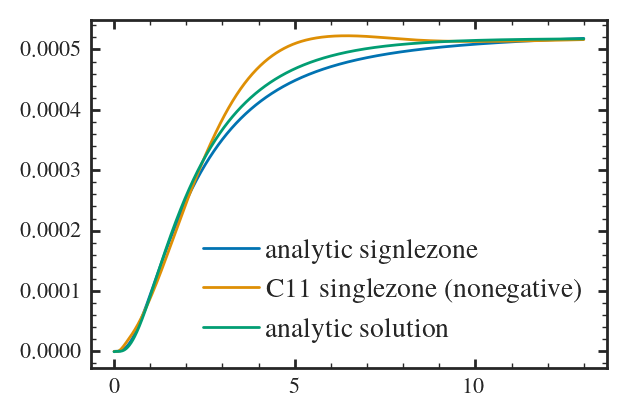

In [191]:
t = np.array(sz.history["time"])
plt.plot(t, sz.history["z(c)"], label="analytic signlezone")
plt.plot(t, np.array(sz_f.history["z(c)"]) / 1.35, label="C11 singlezone (nonegative)")

y = c_model(t, sz_params(t_d_agb=0.1))
plt.plot(t, y, label="analytic solution")

plt.legend()

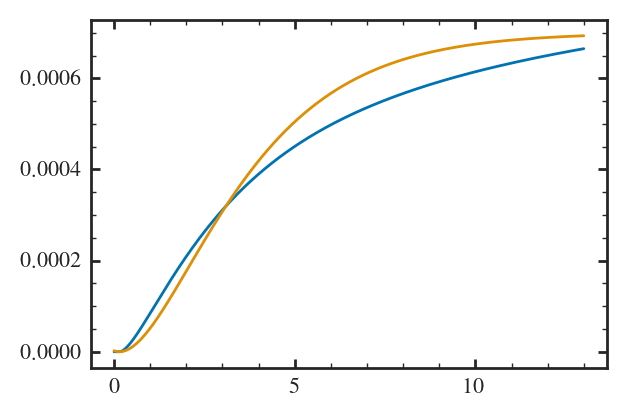

In [192]:
t = np.array(sz.history["time"])
plt.plot(t, sz.history["z(fe)"])
y = fe_model(t, params=sz_params(y_fe_cc=0, t_d_ia=0.15, τ_ia=2))
plt.plot(t, y)
# plt.xscale("log")

In [156]:
from scipy.integrate import quad

In [159]:
[quad(dtd_1, 0, x) for x in t]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [165]:
dt = 0.01

/tmp/slurmtmp.26186432/ipykernel_224579/1813474108.py:2: RuntimeWarning: divide by zero encountered in power
  return np.where(t > 0.15, t**(-1.1), 0)


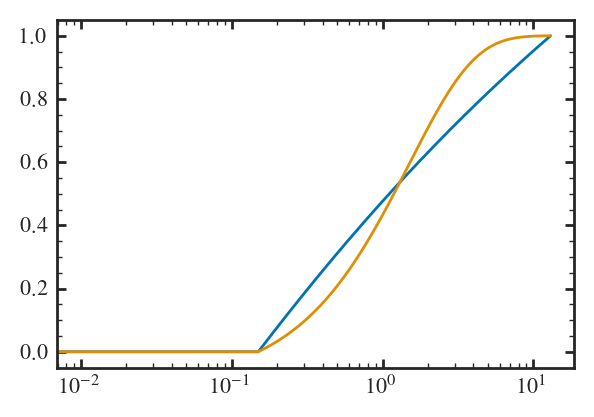

In [173]:
def dtd_1(t):
    return np.where(t > 0.15, t**(-1.1), 0)

def dtd_2(t):
    return np.where(t > 0.15, al * ϵ((t-0.15) * al), 0)

al = 1/1.5
R1 = np.cumsum(dtd_1(t))* dt
R2 = np.cumsum(dtd_2(t)) * dt

plt.plot(t, R1 / R1[-1] )
plt.plot(t, R2 / R2[-1])

plt.xscale("log")

## plt.plot(sz1.history["time"], np.array(sz1.history["Z"])/sz1.history["Z"][-1])
plt.plot(sz1.history["time"], np.array(sz1.history["z(o)"])/sz1.history["z(o)"][-1])
